## Sentiment Analysis Using Random forest and Naive bayes Algorithm

## Importing necessary packages and modules

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.utils import shuffle

## Loading Dataset 

In [2]:
# Load the dataset
df = pd.read_csv('C:/Users/baran/OneDrive/Desktop/New folder (2)/kaggle/app_reviews.csv')

# Displaying the first few rows of the dataset to understand its structure
df.head()

,name,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,WhiteHatJr,All in one Captions,I was very unhappy with this app because I can...,1,1234,1.5.1,2020-09-18 09:21:07,Hi! Thank you for reviewing. Kindly note that ...,2020-09-18 11:58:46,most_relevant,com.whitehatjr
1,WhiteHatJr,githin george,Come on! Man it's not normal for kids to devel...,1,213,1.5.2,2020-09-30 14:34:38,"Hi, Thank you for reviewing and sharing your p...",2020-09-30 16:01:39,most_relevant,com.whitehatjr
2,WhiteHatJr,Anita Choudhury,This app is good for coding but I think this o...,1,156,1.5.1,2020-09-17 17:50:57,Hi! We apologize for the inconvenience. We wou...,2020-09-17 17:59:10,most_relevant,com.whitehatjr
3,WhiteHatJr,Snehil gupta,This app is good for coding but I think this o...,1,82,1.5.2,2020-10-09 21:10:06,"Hi, Thank you for reviewing. Please be apprise...",2020-10-10 10:35:40,most_relevant,com.whitehatjr
4,WhiteHatJr,UTKALIKA PRUSTI,It is good app . But it's app use only who has...,1,150,1.5.1,2020-09-21 05:27:50,Hi! Thank you for reviewing. Kindly note that ...,2020-09-21 10:46:15,most_relevant,com.whitehatjr


## Data Analysis

In [3]:
# Get column names
column_names = df.columns
print("Column names:", column_names)

Column names: Index(['name', 'userName', 'content', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'replyContent', 'repliedAt', 'sortOrder',
       'appId'],
      dtype='object')


In [4]:
# Get data types of columns
data_types = df.dtypes
print("\nData types of columns:")
print(data_types)


Data types of columns:
name                    object
userName                object
content                 object
score                    int64
thumbsUpCount            int64
reviewCreatedVersion    object
at                      object
replyContent            object
repliedAt               object
sortOrder               object
appId                   object
dtype: object


In [5]:
# Get memory usage of the DataFrame
memory_usage = df.memory_usage(deep=True)
print("\nMemory usage of the DataFrame:")
print(memory_usage)


Memory usage of the DataFrame:
Index                       132
name                     849838
userName                 928413
content                 3580154
score                    104912
thumbsUpCount            104912
reviewCreatedVersion     754487
at                       996664
replyContent            2595754
repliedAt                720520
sortOrder                872081
appId                    999494
dtype: int64


In [6]:
# Get basic information about the DataFrame
info = df.info()
print("\nInformation about the DataFrame:")
print(info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13114 entries, 0 to 13113
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   name                  13114 non-null  object
 1   userName              13114 non-null  object
 2   content               13113 non-null  object
 3   score                 13114 non-null  int64 
 4   thumbsUpCount         13114 non-null  int64 
 5   reviewCreatedVersion  10785 non-null  object
 6   at                    13114 non-null  object
 7   replyContent          6838 non-null   object
 8   repliedAt             6838 non-null   object
 9   sortOrder             13114 non-null  object
 10  appId                 13114 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.1+ MB

Information about the DataFrame:
None


In [7]:
# Check for null values
null_values = df.isnull().sum()
print("Null values in each column:")
print(null_values)

Null values in each column:
name                       0
userName                   0
content                    1
score                      0
thumbsUpCount              0
reviewCreatedVersion    2329
at                         0
replyContent            6276
repliedAt               6276
sortOrder                  0
appId                      0
dtype: int64


In [8]:
# Drop null values in 'content' and 'score' columns
df = df.dropna(subset=['content', 'score'])

## Data Preprocessing

In [9]:
# Label sentiment based on score
def label_sentiment(score):
    if score > 3:
        return 'Positive'
    elif score == 3:
        return 'Neutral'
    else:
        return 'Negative'


In [10]:
df['sentiment'] = df['score'].apply(label_sentiment)

In [11]:
df.head()

,name,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId,sentiment
0,WhiteHatJr,All in one Captions,I was very unhappy with this app because I can...,1,1234,1.5.1,2020-09-18 09:21:07,Hi! Thank you for reviewing. Kindly note that ...,2020-09-18 11:58:46,most_relevant,com.whitehatjr,Negative
1,WhiteHatJr,githin george,Come on! Man it's not normal for kids to devel...,1,213,1.5.2,2020-09-30 14:34:38,"Hi, Thank you for reviewing and sharing your p...",2020-09-30 16:01:39,most_relevant,com.whitehatjr,Negative
2,WhiteHatJr,Anita Choudhury,This app is good for coding but I think this o...,1,156,1.5.1,2020-09-17 17:50:57,Hi! We apologize for the inconvenience. We wou...,2020-09-17 17:59:10,most_relevant,com.whitehatjr,Negative
3,WhiteHatJr,Snehil gupta,This app is good for coding but I think this o...,1,82,1.5.2,2020-10-09 21:10:06,"Hi, Thank you for reviewing. Please be apprise...",2020-10-10 10:35:40,most_relevant,com.whitehatjr,Negative
4,WhiteHatJr,UTKALIKA PRUSTI,It is good app . But it's app use only who has...,1,150,1.5.1,2020-09-21 05:27:50,Hi! Thank you for reviewing. Kindly note that ...,2020-09-21 10:46:15,most_relevant,com.whitehatjr,Negative


In [12]:
# Check for imbalances in sentiment
sentiment_counts = df['sentiment'].value_counts()
print("Sentiment distribution:")
print(sentiment_counts)

Sentiment distribution:
sentiment
Negative    4400
Positive    4399
Neutral     4314
Name: count, dtype: int64


In [13]:
# Get the minimum count among all sentiment categories
min_count = sentiment_counts.min()

In [14]:
# Sample from each sentiment category to match the minimum count
positive_samples = df[df['sentiment'] == 'Positive'].sample(n=min_count, replace=False)
neutral_samples = df[df['sentiment'] == 'Neutral'].sample(n=min_count, replace=False)
negative_samples = df[df['sentiment'] == 'Negative'].sample(n=min_count, replace=False)

In [15]:
# Concatenate the sampled dataframes to create a balanced dataframe
balanced_df = pd.concat([positive_samples, neutral_samples, negative_samples])

In [16]:
# Shuffle the dataframe to mix the samples
balanced_df = balanced_df.sample(frac=1).reset_index(drop=True)

In [17]:
# Check the balanced sentiment distribution
balanced_sentiment_counts = balanced_df['sentiment'].value_counts()
print("Balanced sentiment distribution:")
print(balanced_sentiment_counts)

Balanced sentiment distribution:
sentiment
Neutral     4314
Negative    4314
Positive    4314
Name: count, dtype: int64


In [18]:
df.head()

,name,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId,sentiment
0,WhiteHatJr,All in one Captions,I was very unhappy with this app because I can...,1,1234,1.5.1,2020-09-18 09:21:07,Hi! Thank you for reviewing. Kindly note that ...,2020-09-18 11:58:46,most_relevant,com.whitehatjr,Negative
1,WhiteHatJr,githin george,Come on! Man it's not normal for kids to devel...,1,213,1.5.2,2020-09-30 14:34:38,"Hi, Thank you for reviewing and sharing your p...",2020-09-30 16:01:39,most_relevant,com.whitehatjr,Negative
2,WhiteHatJr,Anita Choudhury,This app is good for coding but I think this o...,1,156,1.5.1,2020-09-17 17:50:57,Hi! We apologize for the inconvenience. We wou...,2020-09-17 17:59:10,most_relevant,com.whitehatjr,Negative
3,WhiteHatJr,Snehil gupta,This app is good for coding but I think this o...,1,82,1.5.2,2020-10-09 21:10:06,"Hi, Thank you for reviewing. Please be apprise...",2020-10-10 10:35:40,most_relevant,com.whitehatjr,Negative
4,WhiteHatJr,UTKALIKA PRUSTI,It is good app . But it's app use only who has...,1,150,1.5.1,2020-09-21 05:27:50,Hi! Thank you for reviewing. Kindly note that ...,2020-09-21 10:46:15,most_relevant,com.whitehatjr,Negative


## EDA Visualization

C:\Users\baran\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


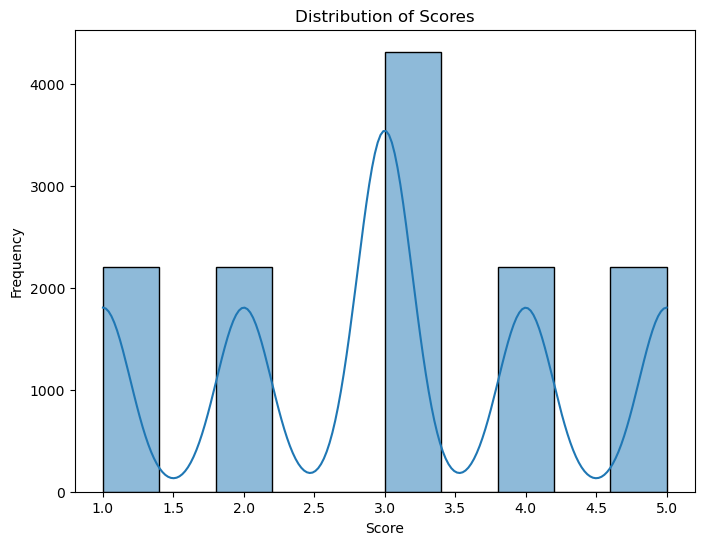

In [19]:
# 1. Distribution of scores
plt.figure(figsize=(8, 6))
sns.histplot(df['score'], bins=10, kde=True)
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

C:\Users\baran\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


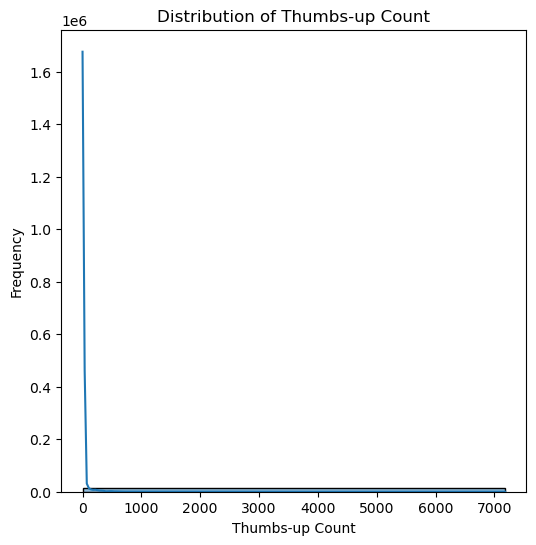

In [20]:
# 2. Thumbs-up count distribution
plt.figure(figsize=(6, 6))
sns.histplot(df['thumbsUpCount'], bins=1, kde=True)
plt.title('Distribution of Thumbs-up Count')
plt.xlabel('Thumbs-up Count')
plt.ylabel('Frequency')
plt.show()

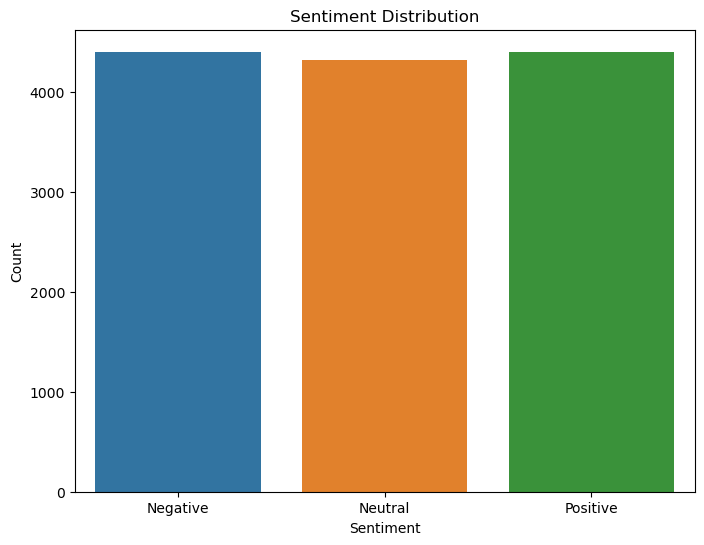

In [21]:
# 3. Sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sentiment')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

C:\Users\baran\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


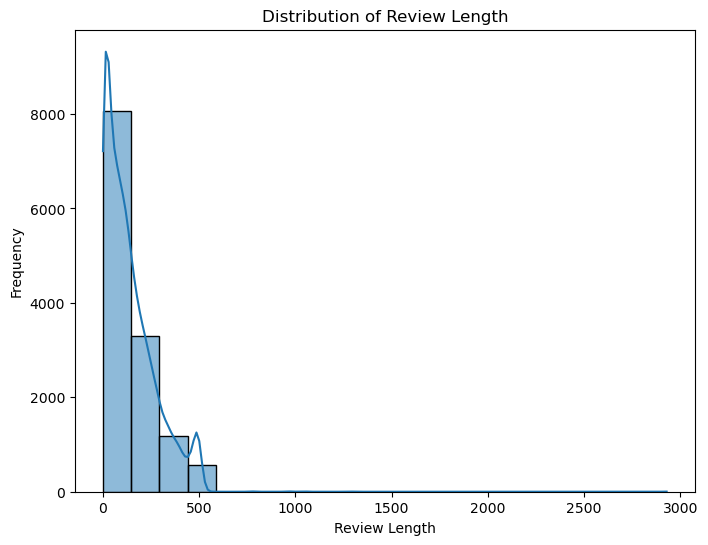

In [22]:
# 4. Review length distribution
df['review_length'] = df['content'].apply(len)
plt.figure(figsize=(8, 6))
sns.histplot(df['review_length'], bins=20, kde=True)
plt.title('Distribution of Review Length')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

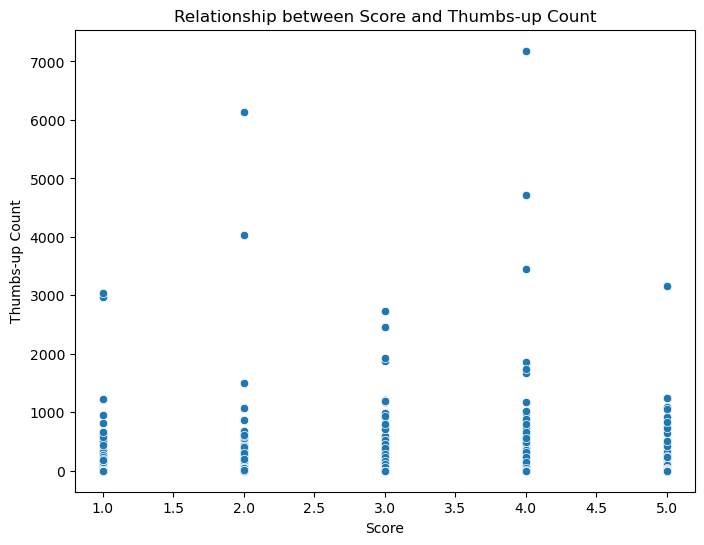

In [23]:
# 5. Relationship between score and thumbs-up count
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='score', y='thumbsUpCount')
plt.title('Relationship between Score and Thumbs-up Count')
plt.xlabel('Score')
plt.ylabel('Thumbs-up Count')
plt.show()

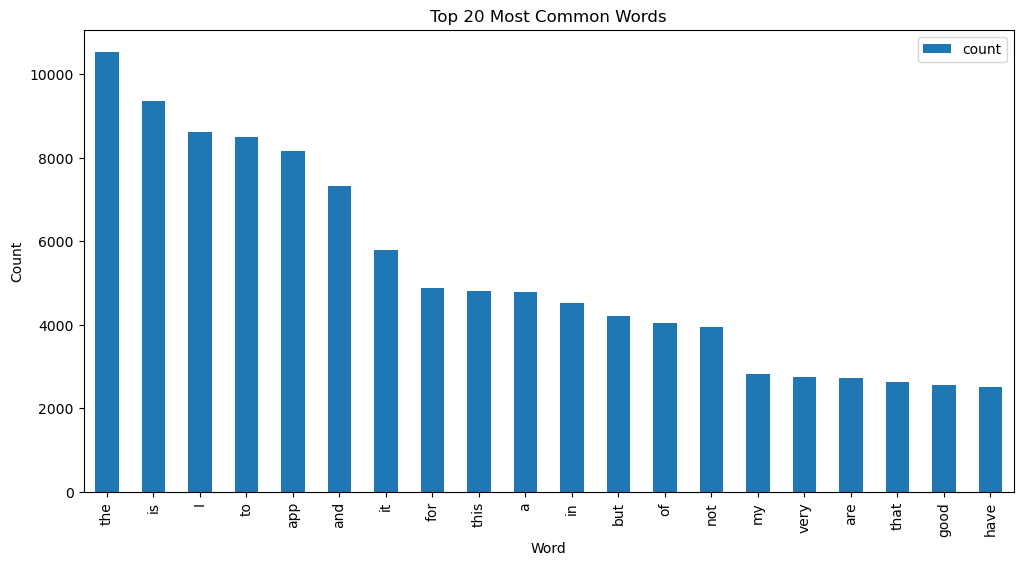

In [24]:
#6 Word frequency analysis
from collections import Counter
word_counts = Counter(" ".join(df['content']).split())
word_counts_df = pd.DataFrame.from_dict(word_counts, orient='index', columns=['count'])
word_counts_df = word_counts_df.sort_values(by='count', ascending=False)
word_counts_df.head(20).plot(kind='bar', figsize=(12, 6))
plt.title('Top 20 Most Common Words')
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()

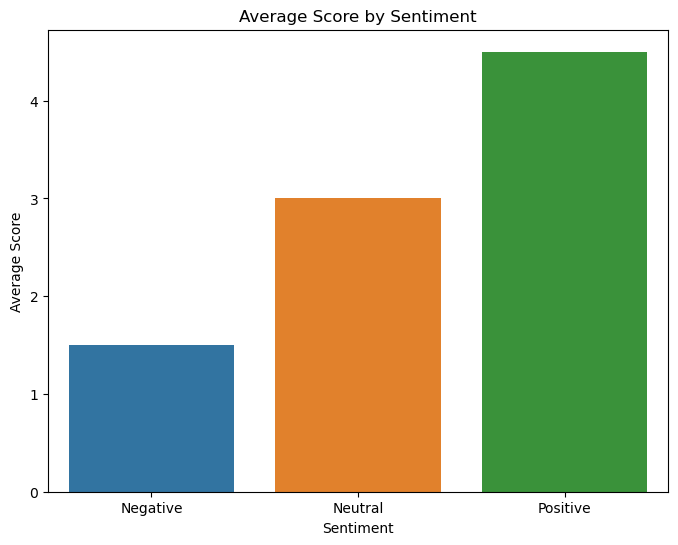

In [25]:
#7 Average score by sentiment
avg_score_by_sentiment = df.groupby('sentiment')['score'].mean()
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_score_by_sentiment.index, y=avg_score_by_sentiment.values)
plt.title('Average Score by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Score')
plt.show()

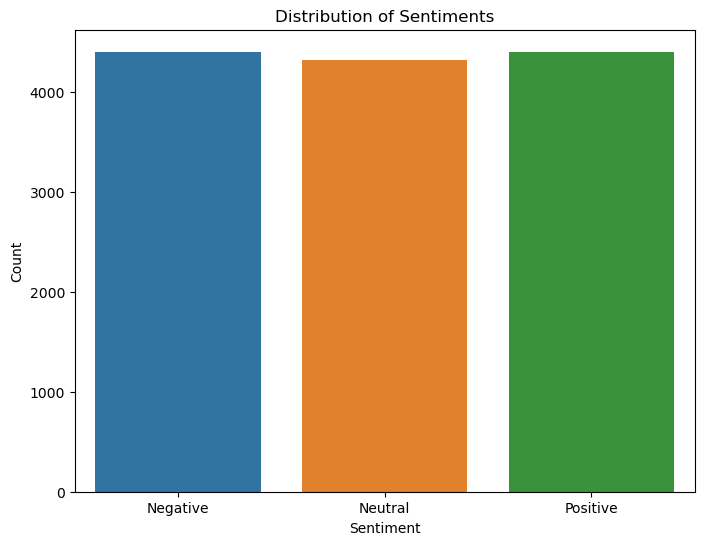

In [26]:
#8 Distribution of sentiments
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

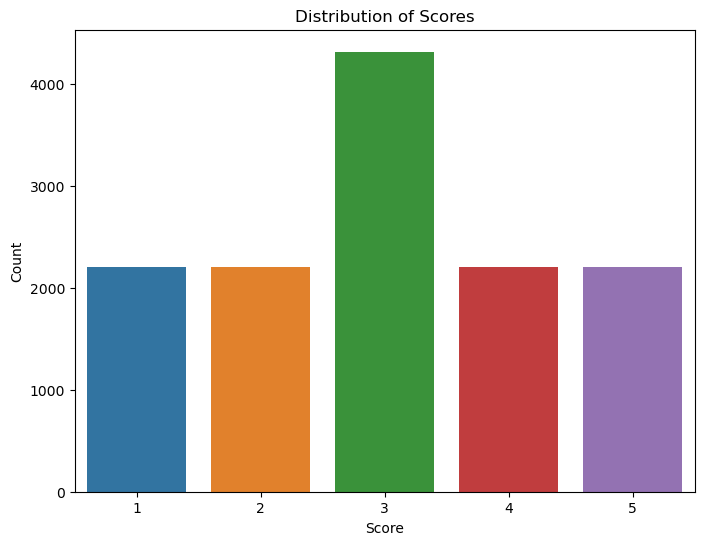

In [27]:
#10 Distribution of scores
plt.figure(figsize=(8, 6))
sns.countplot(x='score', data=df)
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

In [28]:
# Summary statistics of categorical features
categorical_summary = df.describe(include=['object'])

# Visualize as a table
print("Summary statistics of categorical features:")
print(categorical_summary)

Summary statistics of categorical features:
             name       userName content reviewCreatedVersion  \
count       13113          13113   13113                10784   
unique         11          11006   10420                  379   
top     Unacademy  A Google user    Good                1.7.5   
freq         1200             75     295                  685   

                         at  \
count                 13113   
unique                11395   
top     2020-10-08 08:04:34   
freq                      4   

                                             replyContent  \
count                                                6838   
unique                                               3228   
top     Hi! We apologize for the inconvenience. We wou...   
freq                                                  182   

                  repliedAt      sortOrder             appId sentiment  
count                  6838          13113             13113     13113  
unique                

## Word Cloud

In [29]:
# Word cloud of content
from wordcloud import WordCloud

In [30]:
#Combine all content
all_content = ' '.join(df['content'])

In [31]:
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(all_content)

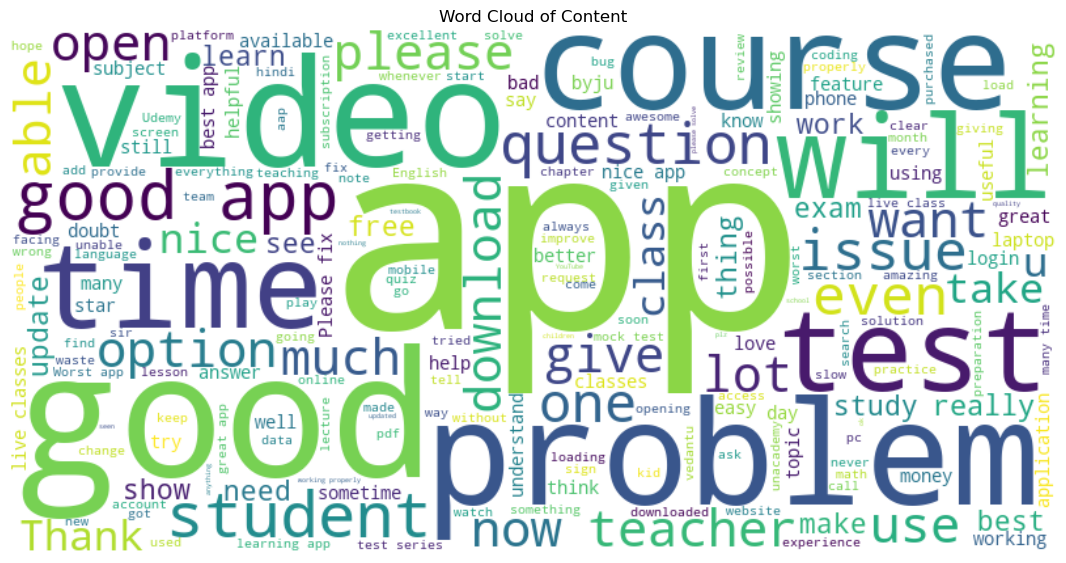

In [32]:
# Plot word cloud
plt.figure(figsize=(13.5, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Content')
plt.axis('off')
plt.show()

## Term frequency-inverse document frequency Vectorizer

In [33]:
# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=12942)

In [34]:
# Apply TF-IDF vectorization to 'content' column
tfidf_features = tfidf_vectorizer.fit_transform(df['content'])

In [35]:
# Convert sparse matrix to DataFrame for easier handling
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [36]:
# Display the TF-IDF matrix
print("\nTF-IDF matrix:")
print(tfidf_df.head())


TF-IDF matrix:
    00  000  00000  00_3  00am   01   03   04   08   09  ...  𝘱𝘳𝘰𝘨𝘳𝘦𝘴𝘴  \
0  0.0  0.0    0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  ...       0.0   
1  0.0  0.0    0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  ...       0.0   
2  0.0  0.0    0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  ...       0.0   
3  0.0  0.0    0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  ...       0.0   
4  0.0  0.0    0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  ...       0.0   

   𝘴𝘺𝘭𝘭𝘢𝘣𝘶𝘴  𝘵𝘦𝘤𝘩𝘯𝘪𝘤𝘢𝘭𝘭𝘺  𝘵𝘩𝘪𝘴  𝘶𝘱𝘥𝘢𝘵𝘦  𝘸𝘰𝘳𝘴𝘵  𝘽𝙮𝙟𝙪𝙨  𝙈𝙚𝙣𝙚  𝙋𝙡𝙚𝙖𝙨𝙚  𝙥𝙡𝙚𝙖𝙨𝙚  
0       0.0          0.0   0.0     0.0    0.0    0.0   0.0     0.0     0.0  
1       0.0          0.0   0.0     0.0    0.0    0.0   0.0     0.0     0.0  
2       0.0          0.0   0.0     0.0    0.0    0.0   0.0     0.0     0.0  
3       0.0          0.0   0.0     0.0    0.0    0.0   0.0     0.0     0.0  
4       0.0          0.0   0.0     0.0    0.0    0.0   0.0     0.0     0.0  

[5 rows x 10626 columns]


## Splitting the data into training and testing sets of ratio 70:30

In [37]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_features, df['sentiment'], test_size=0.3, random_state=42)

# Display the shapes of the training and testing sets
print("\nTraining set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (9179, 10626) (9179,)
Testing set shape: (3934, 10626) (3934,)


## Random Forest Classifier

In [38]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [39]:
# Train the Random Forest classifier
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [40]:
# Predictions on the testing set
y_pred = rf_classifier.predict(X_test)

In [41]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.6469242501270971

Classification Report:
              precision    recall  f1-score   support

    Negative       0.65      0.75      0.70      1305
     Neutral       0.62      0.47      0.53      1294
    Positive       0.66      0.72      0.69      1335

    accuracy                           0.65      3934
   macro avg       0.64      0.65      0.64      3934
weighted avg       0.64      0.65      0.64      3934



In [42]:
# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=12942)

In [43]:
# Apply TF-IDF vectorization to 'content' column
tfidf_features = tfidf_vectorizer.fit_transform(df['content'])

In [44]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_features, df['sentiment'], test_size=0.2, random_state=42)

In [45]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

## Naive Bayes Classifier

In [46]:
# Naive Bayes Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
nb_pred = nb_classifier.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_pred)

In [47]:
print("Naive Bayes Accuracy:", nb_accuracy)

Naive Bayes Accuracy: 0.5825390773922989


In [48]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, nb_pred))


Classification Report:
              precision    recall  f1-score   support

    Negative       0.60      0.68      0.64       874
     Neutral       0.47      0.38      0.42       831
    Positive       0.63      0.68      0.66       918

    accuracy                           0.58      2623
   macro avg       0.57      0.58      0.57      2623
weighted avg       0.57      0.58      0.58      2623



## Model Comparison


Random Forest Confusion Matrix:
[[669 120  85]
 [192 454 185]
 [122 173 623]]


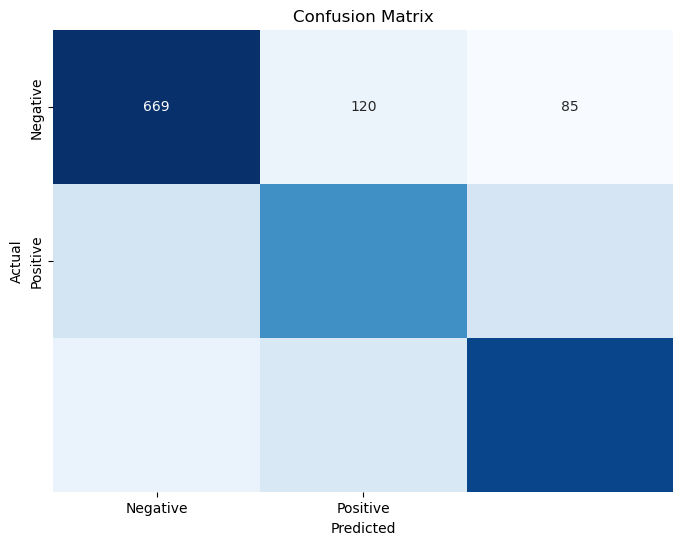

In [49]:
# Compare the two models using confusion matrices
print("\nRandom Forest Confusion Matrix:")
print(confusion_matrix(y_test, rf_pred))
conf_matrix = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Naive Bayes Confusion Matrix:
[[592 167 115]
 [274 313 244]
 [115 180 623]]


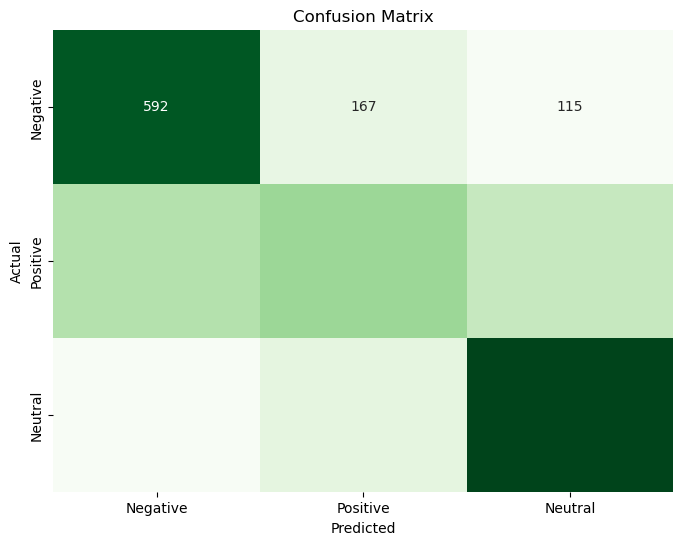

In [50]:
print("\nNaive Bayes Confusion Matrix:")
print(confusion_matrix(y_test, nb_pred))
conf_matrix = confusion_matrix(y_test, nb_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False, 
            xticklabels=['Negative', 'Positive', 'Neutral'], yticklabels=['Negative', 'Positive', 'Neutral'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Hybrid Algorithm

In [51]:
# Hybrid Algorithm
def hybrid_algorithm(input_text):
    preprocessed_input = tfidf_vectorizer.transform([input_text])
    rf_prediction = rf_classifier.predict(preprocessed_input)
    nb_prediction = nb_classifier.predict(preprocessed_input)
    if rf_prediction == nb_prediction:
        return rf_prediction[0]
    else:
        return "Hybrid Algorithm: Undetermined"

In [52]:
# Shuffle the data and reset indices
data_shuffled = shuffle(df, random_state=42).reset_index(drop=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_shuffled['content'], data_shuffled['sentiment'], test_size=0.2, random_state=42)

# Function to calculate hybrid algorithm accuracy
def calculate_hybrid_accuracy(X_test, y_test):
    correct_predictions = 0
    total_predictions = len(X_test)
    for i in range(total_predictions):
        input_text = X_test.iloc[i]  # Access data using iloc
        true_label = y_test.iloc[i]  # Access data using iloc
        hybrid_predicted_sentiment = hybrid_algorithm(input_text)
        
        if hybrid_predicted_sentiment == true_label:
            correct_predictions += 1
    
    hybrid_accuracy = correct_predictions / total_predictions
    return hybrid_accuracy

In [53]:
 # Calculate hybrid algorithm accuracy
hybrid_accuracy = calculate_hybrid_accuracy(X_test, y_test)
print("\nHybrid Algorithm Accuracy:", hybrid_accuracy)


Hybrid Algorithm Accuracy: 0.6355318337781166


## Fine-Tuning Hybrid Algorithm

In [54]:
# Refined Hybrid Algorithm incorporating confidence levels
def hybrid_algorithm(input_text):
    preprocessed_input = tfidf_vectorizer.transform([input_text])
    rf_confidence = rf_classifier.predict_proba(preprocessed_input)
    nb_confidence = nb_classifier.predict_proba(preprocessed_input)
    rf_prediction = rf_classifier.predict(preprocessed_input)
    nb_prediction = nb_classifier.predict(preprocessed_input)
    
    rf_max_confidence = np.max(rf_confidence)
    nb_max_confidence = np.max(nb_confidence)
    
    if rf_prediction == nb_prediction:
        return rf_prediction[0], max(rf_max_confidence, nb_max_confidence)
    else:
        # Choosing the model with higher confidence
        if rf_max_confidence > nb_max_confidence:
            return rf_prediction[0], rf_max_confidence
        else:
            return nb_prediction[0], nb_max_confidence

In [55]:
# Test the refined hybrid algorithm for a single input
test_input = "This app is amazing!"
hybrid_prediction, confidence = hybrid_algorithm(test_input)
print("\nHybrid Prediction:", hybrid_prediction)
print("Confidence Level:", confidence)


Hybrid Prediction: Positive
Confidence Level: 0.7524642857142855


In [56]:
# Function to calculate hybrid algorithm accuracy
def calculate_hybrid_accuracy(X_test, y_test):
    correct_predictions = 0
    total_predictions = len(X_test)
    for i in range(total_predictions):
        input_text = X_test.iloc[i]  # Access data using iloc
        true_label = y_test.iloc[i]  # Access data using iloc
        hybrid_predicted_sentiment, _ = hybrid_algorithm(input_text)
        
        if hybrid_predicted_sentiment == true_label:
            correct_predictions += 1
    
    hybrid_accuracy = correct_predictions / total_predictions
    return hybrid_accuracy

In [57]:
# Calculate hybrid algorithm accuracy
hybrid_accuracy = calculate_hybrid_accuracy(X_test, y_test)
print("\nHybrid Algorithm Accuracy:", hybrid_accuracy)


Hybrid Algorithm Accuracy: 0.8806709874189859


In [58]:
# Refined Hybrid Algorithm incorporating confidence levels and predictions
def hybrid_algorithm(input_text):
    preprocessed_input = tfidf_vectorizer.transform([input_text])
    rf_confidence = rf_classifier.predict_proba(preprocessed_input)
    nb_confidence = nb_classifier.predict_proba(preprocessed_input)
    rf_prediction = rf_classifier.predict(preprocessed_input)
    nb_prediction = nb_classifier.predict(preprocessed_input)
    
    rf_max_confidence = np.max(rf_confidence)
    nb_max_confidence = np.max(nb_confidence)
    
    if rf_prediction == nb_prediction:
        return rf_prediction[0], max(rf_max_confidence, nb_max_confidence)
    else:
        # Choosing the model with higher confidence
        if rf_max_confidence > nb_max_confidence:
            return rf_prediction[0], rf_max_confidence
        else:
            return nb_prediction[0], nb_max_confidence

In [59]:
# Initialize lists to store predictions and confidence levels
hybrid_predictions = []
confidences = []

# Iterate over each test sample
for i in range(len(X_test)):
    input_text = X_test.iloc[i]
    prediction, confidence = hybrid_algorithm(input_text)
    hybrid_predictions.append(prediction)
    confidences.append(confidence)



Classification Report (Hybrid Algorithm):
              precision    recall  f1-score   support

    Negative       0.91      0.91      0.91       847
     Neutral       0.88      0.84      0.86       912
    Positive       0.85      0.90      0.87       864

    accuracy                           0.88      2623
   macro avg       0.88      0.88      0.88      2623
weighted avg       0.88      0.88      0.88      2623



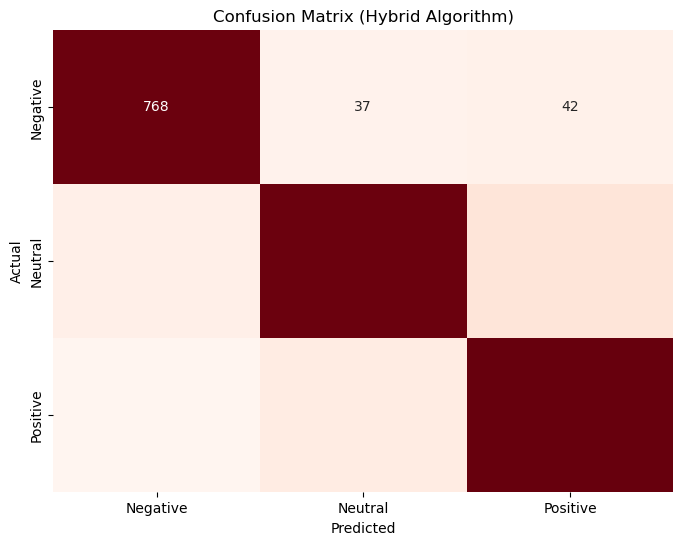

In [60]:
# Print classification report for hybrid algorithm
print("\nClassification Report (Hybrid Algorithm):")
print(classification_report(y_test, hybrid_predictions))

# Compute confusion matrix for hybrid algorithm
hybrid_conf_matrix = confusion_matrix(y_test, hybrid_predictions)

# Visualize confusion matrix for hybrid algorithm
plt.figure(figsize=(8, 6))
sns.heatmap(hybrid_conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=False, 
            xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Hybrid Algorithm)')
plt.show()


In [61]:
# Test the hybrid algorithm for a single input
test_input = X_test.iloc[990]  # Assuming X_test_text contains the original text data
print("Input Text:", test_input)
hybrid_prediction = hybrid_algorithm(test_input)
print("Hybrid Prediction:", hybrid_prediction)

Input Text: Lots of fun ways to learn about topics.
Hybrid Prediction: ('Positive', 0.9333783783783783)


## Testing the hybrid algorithm

In [62]:
#Function to test user input sentiment with the hybrid model
def test_user_input_sentiment(input_text):
    hybrid_predicted_sentiment = hybrid_algorithm(input_text)
    return hybrid_predicted_sentiment

In [63]:
# Prompt the user for input
user_input = input("Enter your review: ")

Enter your review:  this app dosent work well


In [64]:
# Test user input sentiment with the hybrid model
hybrid_predicted_sentiment = test_user_input_sentiment(user_input)

In [65]:
# Display the predicted sentiment
print("\nPredicted Sentiment (Hybrid):", hybrid_predicted_sentiment)


Predicted Sentiment (Hybrid): ('Negative', 0.463585703584627)


## Accuracy comparison the model used

In [66]:
accuracy_scores = {
    'Random Forest': 0.64,
    'Naive Bayes': 0.58,
    'Hybrid': 0.88
}

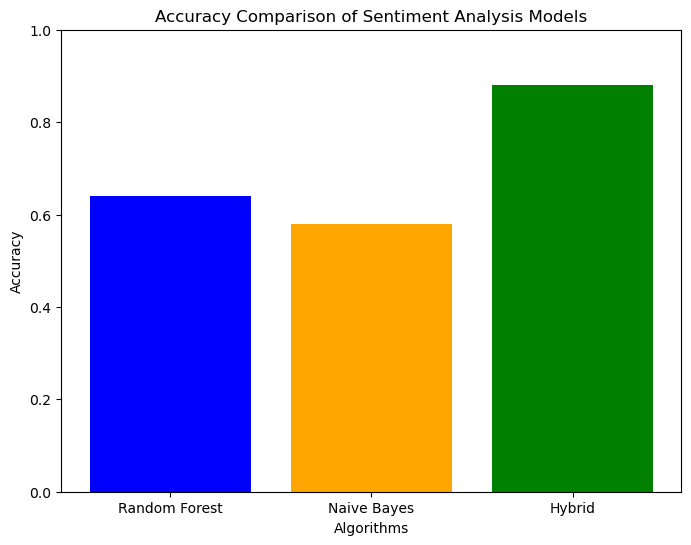

In [67]:
# 1. Accuracy Comparison Chart
plt.figure(figsize=(8, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['blue', 'orange', 'green'])
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Sentiment Analysis Models')
plt.ylim(0, 1)  # Set y-axis limit
plt.show()

## Findings

In [72]:
# Count the number of reviews for each app
app_review_counts = df['name'].value_counts()

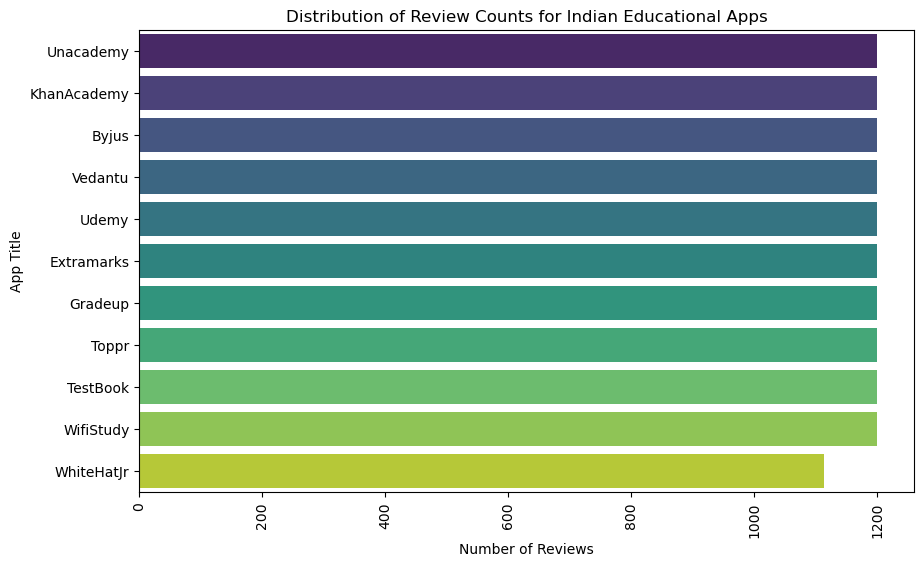

In [75]:
# Plot the distribution of review counts for Indian educational apps
plt.figure(figsize=(10, 6))
sns.barplot(x=app_review_counts.values, y=app_review_counts.index, palette='viridis')
plt.xticks(rotation=90)
plt.title('Distribution of Review Counts for Indian Educational Apps')
plt.xlabel('Number of Reviews')
plt.ylabel('App Title')
plt.show()

In [78]:
# Calculate average score for each app
average_scores = df.groupby('name')['score'].mean().sort_values(ascending=False)


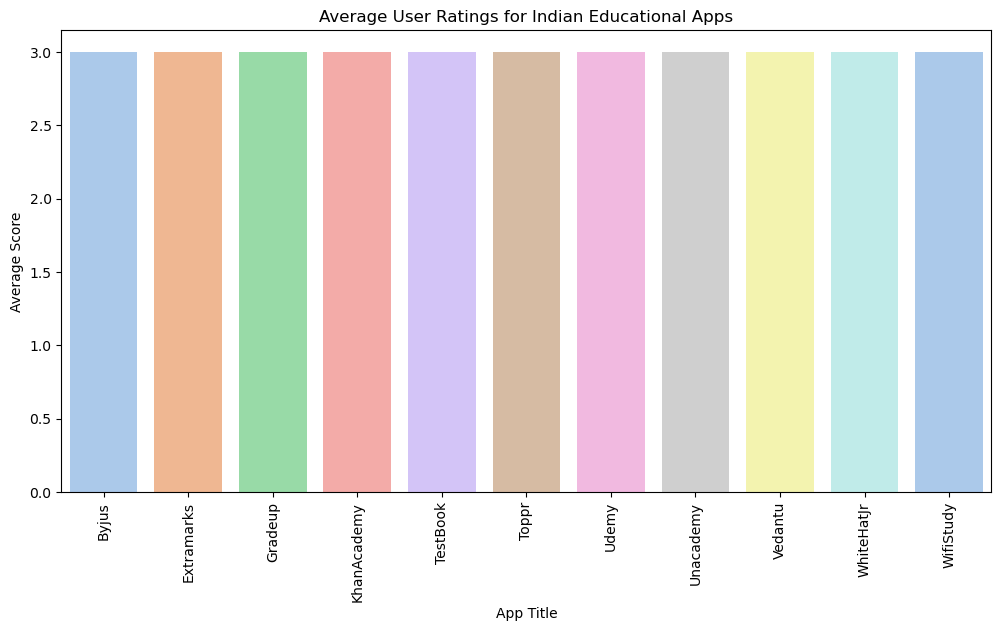

In [79]:
# Plot the average score for each app
plt.figure(figsize=(12, 6))
sns.barplot(x=average_scores.index, y=average_scores.values, palette='pastel')
plt.xticks(rotation=90)
plt.title('Average User Ratings for Indian Educational Apps')
plt.xlabel('App Title')
plt.ylabel('Average Score')
plt.show()

In [80]:
# Extract common positive and negative sentiments
positive_reviews = df[df['score'] > 3]['content'].values
negative_reviews = df[df['score'] < 3]['content'].values

In [82]:
# Print common positive sentiments
print("Common Positive Sentiments:")
for review in positive_reviews[:5]:
    print("*", review)

Common Positive Sentiments:
* Problem is that I am not able to use this app on my mobiles and it says that refer to your 5 friends to get a macbook I refer to my 20 or 25 friends but still am not getting any macbook and it shows the option to copy but there is nothing to copy there what should I copyand one more thing I want to say that is that this app works very well in laptops in PC but I don't have a PC but still I would say that the students that have PC this app will really help you
* Hey, I installed and registered in this app. And this application only works on pc Or laptops . I don't have a pc so I invited my 5 friends to get this macbook that WhiteHat jr offered. After I invited them and they installed the app and started using I didn't get any messages or mails from this app that I will get a macbook.
* I really like this app but it has one disadvantag😢 that it only connects to pc or laptop. So I can not use this app right now. So I have to wait until my laptop or PC don't c

In [83]:
# Print common negative sentiments
print("\nCommon Negative Sentiments:")
for review in negative_reviews[:5]:
    print("*", review)


Common Negative Sentiments:
* I was very unhappy with this app because I can't see even one video in this app. Nowadays all are using mobiles but rarely using PC'S and laptops. So if they could allow in mobile then it would be very happy. If anyone want to download the app if you have PC or laptop then only download this otherwise don't because your MB will be waste.
* Come on! Man it's not normal for kids to develop app and to understand coding. Apps like this will make our children total loosers. And the television ad, is the most ridiculous of all. Giving children more reasons to sit infornt of a phone or tablet is ridiculous. I only downloaded this app to put this review here.
* This app is good for coding but I think this organisation is making us fool because they said that when we invite 5friends here then they will give us a free MacBook, but when I invite 5friends here and they joined/registered and 1member take trial class, then also they don't give any message to my emal/ge

In [84]:
# Identify top 10 most popular apps based on review counts
top_popular_apps = app_review_counts.head(10)

In [87]:
# Identify top 10 highest-rated apps based on average ratings
top_rated_apps = average_scores.sort_values(ascending=False).head(10)

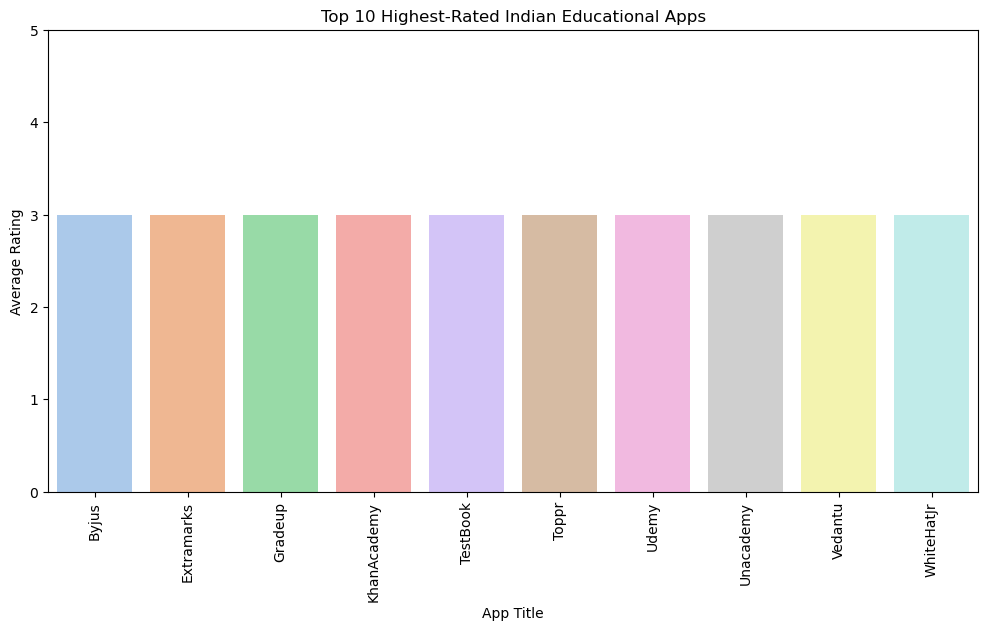

In [88]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_rated_apps.index, y=top_rated_apps.values, palette='pastel')
plt.xticks(rotation=90)
plt.title('Top 10 Highest-Rated Indian Educational Apps')
plt.xlabel('App Title')
plt.ylabel('Average Rating')
plt.ylim(0, 5)  # Set y-axis limit to show ratings between 0 and 5
plt.show()

In [89]:
# Choose a competitor's app for comparison (replace 'Competitor App Name' with actual app name)
competitor_app = 'Byjus'

In [90]:
# Filter data for the competitor's app
competitor_data = df[df['name'] == competitor_app]

In [91]:
# Calculate sentiment distribution for the competitor's app
competitor_sentiment_counts = competitor_data['score'].apply(lambda score: 'Positive' if score > 3 else 'Neutral' if score == 3 else 'Negative').value_counts()


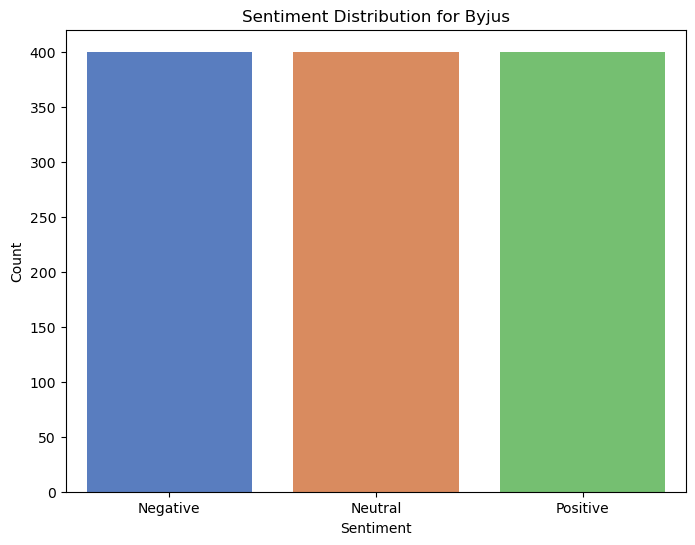

In [92]:
# Plot the sentiment distribution for the competitor's app
plt.figure(figsize=(8, 6))
sns.barplot(x=competitor_sentiment_counts.index, y=competitor_sentiment_counts.values, palette='muted')
plt.title(f'Sentiment Distribution for {competitor_app}')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [94]:
# Compare average ratings of the competitor's app with top-rated apps
comparison_data = pd.concat([average_scores[top_rated_apps.index], competitor_data.groupby('name')['score'].mean()])
comparison_data.index = ['Top Rated Apps'] * 10 + [competitor_app]  # Assign labels for comparison


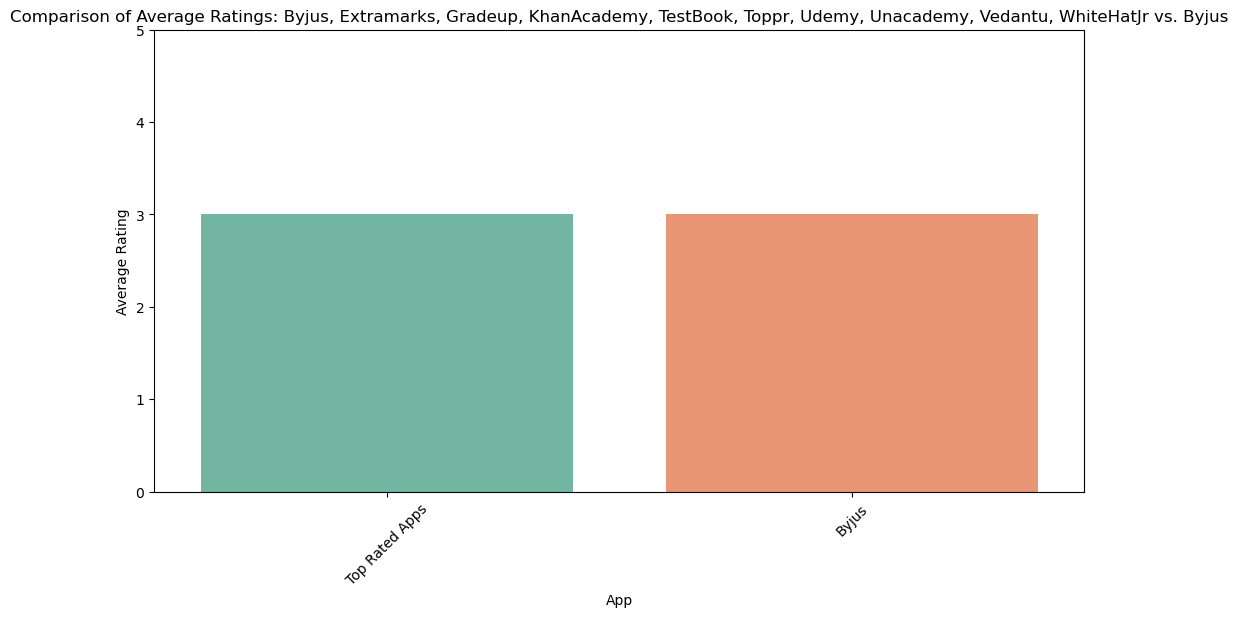

In [95]:
# Plot the comparison of average ratings
plt.figure(figsize=(12, 6))
sns.barplot(x=comparison_data.index, y=comparison_data.values, palette='Set2')
plt.title(f'Comparison of Average Ratings: {", ".join(top_rated_apps.index)} vs. {competitor_app}')
plt.xlabel('App')
plt.ylabel('Average Rating')
plt.ylim(0, 5)  # Set y-axis limit to show ratings between 0 and 5
plt.xticks(rotation=45)
plt.show()

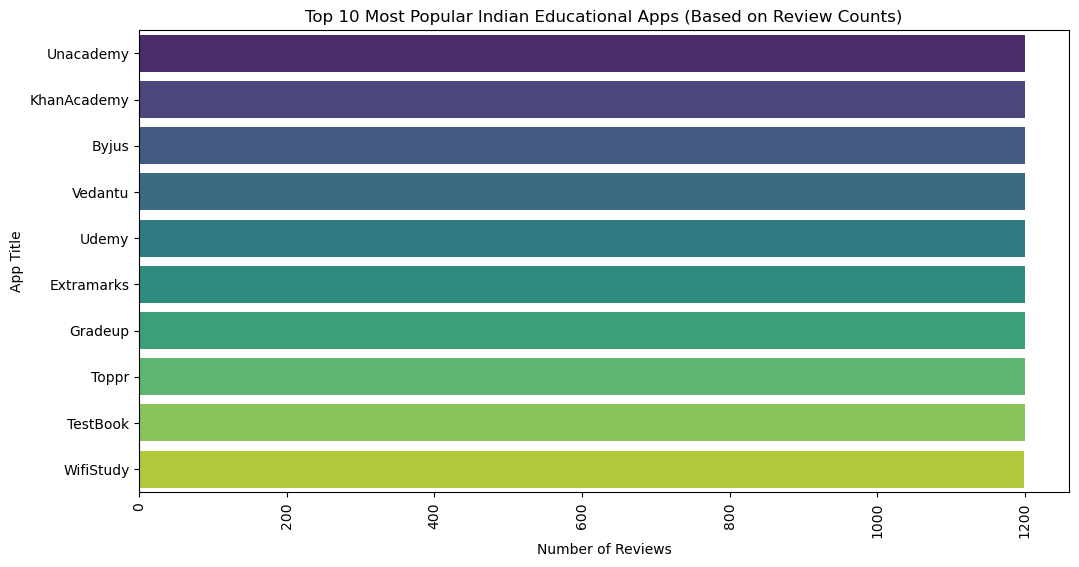

In [97]:
# Plot the distribution of review counts for top popular apps
plt.figure(figsize=(12, 6))
sns.barplot(x=top_popular_apps.values, y=top_popular_apps.index, palette='viridis')
plt.xticks(rotation=90)
plt.title('Top 10 Most Popular Indian Educational Apps (Based on Review Counts)')
plt.xlabel('Number of Reviews')
plt.ylabel('App Title')
plt.show()

In [98]:
# Filter comments with a score greater than 3 (positive comments)
positive_comments = df[df['score'] > 3]

In [100]:
# Calculate the count of positive comments for each app
positive_comments_count = positive_comments['name'].value_counts()


In [101]:
# Find the app with the most positive comments
most_positive_app = positive_comments_count.idxmax()
most_positive_comments_count = positive_comments_count.max()

In [102]:
print(f"The app with the most positive comments is '{most_positive_app}' with {most_positive_comments_count} positive comments.")

The app with the most positive comments is 'WhiteHatJr' with 400 positive comments.


In [103]:
# Filter comments with a score less than 3 (negative comments)
negative_comments = df[df['score'] < 3]

In [104]:
# Calculate the count of negative comments for each app
negative_comments_count = negative_comments['name'].value_counts()


In [105]:
# Find the app with the most negative comments
most_negative_app = negative_comments_count.idxmax()
most_negative_comments_count = negative_comments_count.max()

In [106]:
print(f"The app with the most negative comments is '{most_negative_app}' with {most_negative_comments_count} negative comments.")

The app with the most negative comments is 'WhiteHatJr' with 400 negative comments.


In [111]:
# Calculate the sentiment count for each app
sentiment_count = df.groupby(['name', 'sentiment']).size().unstack(fill_value=0)


In [112]:
print("Sentiment count of each app:")
print(sentiment_count)

Sentiment count of each app:
sentiment    Negative  Neutral  Positive
name                                    
Byjus             400      400       400
Extramarks        400      400       400
Gradeup           400      400       400
KhanAcademy       400      400       400
TestBook          400      400       400
Toppr             400      400       400
Udemy             400      400       400
Unacademy         400      400       400
Vedantu           400      400       400
WhiteHatJr        400      314       400
WifiStudy         400      400       399
